<a href="https://colab.research.google.com/github/shestakovm/collabproject/blob/main/%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D1%8C%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание - загрузка таблицы смс-спама, создание обучающей и проверочной выборки.
Создание и обучение модели, которая определяет тип сообщения ( спам или не спам )

Взято 10 случайных примеров из всей базы, сделано предсказание нейронкой и выведите результат в читаемом виде:

“текст сообщения” - “категория сообщения, определенная нейронкой”.

In [ ]:
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time
import seaborn as sns # Импортируем библиотеку seaborn
sns.set_style('darkgrid') # Устанавливаем стиль графиков

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv(open('/content/drive/MyDrive/neural/pandas/psy.csv', errors = 'replace')) # загрузка таблицы смс-спама
df

,comment_id,author,date,content,class
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",True
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,True
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,True
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,True
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,True
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,False
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,False
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,True
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,True


In [ ]:
df.drop(df.columns[0:3], axis=1, inplace=True) # избавление от ненужных данных
df

,content,class
0,"Huh, anyway check out this you[tube] channel: ...",True
1,Hey guys check out my new channel and our firs...,True
2,just for test I have to say murdev.com,True
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,True
4,watch?v=vtaRGgvGtWQ Check this out .﻿,True
...,...,...
345,How can this have 2 billion views when there's...,False
346,I don't now why I'm watching this in 2014﻿,False
347,subscribe to me for call of duty vids and give...,True
348,hi guys please my android photo editor downloa...,True


In [ ]:
df.iloc[:,1]=df.iloc[:,1].astype('uint8') # перевод truе и false в 1 и 0
df

,content,class
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
345,How can this have 2 billion views when there's...,0
346,I don't now why I'm watching this in 2014﻿,0
347,subscribe to me for call of duty vids and give...,1
348,hi guys please my android photo editor downloa...,1


In [ ]:
x_data = df.iloc[:,0].values # входящие данные по сообщениям
y_data = df.iloc[:,1].values # выходящие данные по классам

In [ ]:
x_data_classes = [''.join(x_data[y_data==0])]
x_data_classes.append(''.join(x_data[y_data==1]))

In [ ]:
y_data = utils.to_categorical(y_data,2, dtype='uint8') # перевод в one hot encoding

In [ ]:
data = ''.join(x_data) # данные для обучения токенайзера

In [ ]:
num = 0.3 # 30% по символам в x_train и x_test

In [ ]:
idx_data = int(len(x_data)*num) # индекс по которому будут выводиться данные

In [ ]:
X_Train = x_data[:-idx_data] # данные для обучающей выборки
y_train = y_data[:-idx_data]

In [ ]:
X_Test = x_data[-idx_data:] # данные для проверочной выборки
y_test = y_data[-idx_data:]

In [ ]:
maxWordsCount = 3000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', lower=True, split=' ', char_level=False, oov_token = 'unknown')
# токенайзер для разбиения текста и превращения в матрицу  числовых значений
tokenizer.fit_on_texts(x_data)


In [ ]:
hist_nums = np.array(tokenizer.texts_to_sequences(x_data_classes)) # для гистограммы

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
X_train = tokenizer.texts_to_sequences(X_Train)
X_test = tokenizer.texts_to_sequences(X_Test)

In [ ]:
xlen = 15
x_train_em = pad_sequences(X_train, padding='post', maxlen=xlen)  # Преобразования в матрицу индексов
x_test_em = pad_sequences(X_test, padding='post', maxlen=xlen)

In [ ]:
# Для Bag of words
x_train_bow = tokenizer.sequences_to_matrix(x_train_em.tolist()).astype('uint8') # Преобразования в bag of words
x_test_bow = tokenizer.sequences_to_matrix(x_test_em.tolist()).astype('uint8')

In [ ]:
model = Sequential() 
model.add(Dense(300, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train_bow, y_train, validation_data=(x_test_bow, y_test), epochs=100, batch_size=200, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 65ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.3468 - val_accuracy: 0.8952
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.3453 - val_accuracy: 0.8952
Epoch 3/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.3434 - val_accuracy: 0.8952
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.3414 - val_accuracy: 0.8952
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3394 - val_accuracy: 0.8952
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.3377 - val_accuracy: 0.9048
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3360 - val_accuracy: 0.9048
Epoch 8/100
2/2 [===

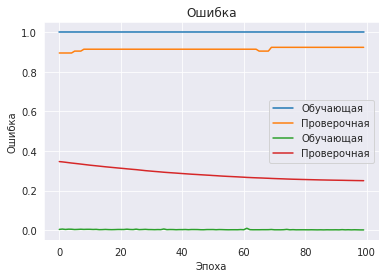

In [ ]:
plt.plot(history.history['accuracy'], label = 'Обучающая')
plt.plot(history.history['val_accuracy'], label = 'Проверочная')
plt.title('Точность')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.plot(history.history['loss'], label = 'Обучающая')
plt.plot(history.history['val_loss'], label = 'Проверочная')
plt.title('Ошибка')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
predictions = np.array([np.argmax(i) for i in model.predict(x_test_bow)])
y_test_real = np.array([np.argmax(i) for i in y_test])
for i in range(10,20):
  print(f'предсказано  {predictions[i]}, было {y_test_real[i]}, {predictions[i]==y_test_real[i]}')

предсказано  0, было 0, True
предсказано  1, было 1, True
предсказано  0, было 0, True
предсказано  0, было 0, True
предсказано  1, было 1, True
предсказано  0, было 0, True
предсказано  1, было 1, True
предсказано  0, было 0, True
предсказано  0, было 0, True
предсказано  1, было 0, False


In [ ]:
print(f'процент верных предсказаний -  {round((predictions==y_test_real).mean()*100,2)},%')

процент верных предсказаний -  92.38,%


In [ ]:
y_test_nums = np.array([np.argmax(i) for i in y_test])
for i in range(10,20):
  n = np.random.randint(0,2) # случайный класс
  posled = x_test_em[y_test_nums==n][i]
  matr = x_test_bow[y_test_nums==n][i]

  print('\n',*tokenizer.sequences_to_texts(posled[None]))  # Получаем предложение
  print('СПАМ' if np.argmax(model.predict(matr[None]))==1 else 'Не Спам')  # Получаем класс




 still a very fun music video to watch unknown unknown unknown unknown unknown unknown unknown
Не Спам

 follower please https www facebook com lists 161620527267482 unknown unknown unknown unknown unknown unknown unknown
СПАМ

 video 5 you are complaining to much on how the heck this has 2b hits
Не Спам

 heart https www indiegogo com projects i want to go to college 19 x 9082175
СПАМ

 twsfzz9whn7jusvhufpglqrzczl05fnphagevb3x8ydmc6x jtcjnmho vfxwcjzyvwobihrngx2ocjng2pg1evhxzyjd o3h ry6f57sprnd2xv bzszz 8 bps a 390875584405933 391725794320912 type 1 amp theater
СПАМ

 i am so awesome and smart sucscribe to me unknown unknown unknown unknown unknown unknown
Не Спам

 does this have 2 billion views when there are only 3 people in the world'
Не Спам

 http hackfbaccountlive com ref 4436607 psy news offıcal unknown unknown unknown unknown unknown unknown unknown
СПАМ

 why does this have 2 billion views this song is so annoying unknown unknown unknown
Не Спам

 1 millioon dislikessssssss